Ising Metropolis Module Playground

In [1]:
import ising_metropolis as im 
import matplotlib.pyplot as plt

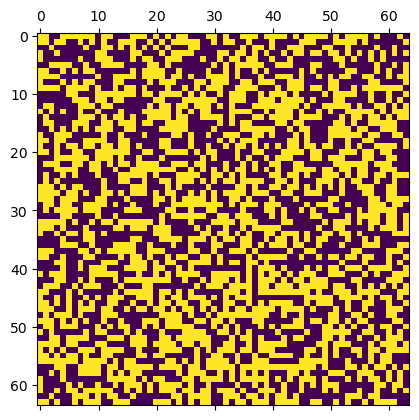

In [2]:
random_grid = im.create_random_grid(grid_shape=(64,64))
plt.matshow(random_grid);

In [3]:
random_grid.sum()

36

In [4]:
random_spin_coordinates= im.select_random_spin(random_grid)

Selected spin:  (29, 22)


In [5]:
random_spin_coordinates

[29, 22]

In [6]:
L = random_grid.shape[0]
total_energy=0.0
J=1
for i in range(L):
    for j in range(L):
        right = (i+1)%L 
        down = (j+1)%L
        total_energy -= J*random_grid[i,j]*(random_grid[right,j]+random_grid[i,down])

total_energy

124.0

In [7]:
grid, energies, magnetizations = im.metropolis_sweep(random_grid, T=1, J=1, n_steps=100, sample_interval=10)

Step:  0
Selected spin:  (38, 9)

 Calculated energy diff for spin in coordinates  [38, 9]  is  -4

 Energy difference is less than 0, decided TO FLIP
Step:  1
Selected spin:  (52, 44)

 Calculated energy diff for spin in coordinates  [52, 44]  is  -4

 Energy difference is less than 0, decided TO FLIP
Step:  2
Selected spin:  (3, 23)

 Calculated energy diff for spin in coordinates  [3, 23]  is  0

 Energy difference is less than 0, decided TO FLIP
Step:  3
Selected spin:  (13, 54)

 Calculated energy diff for spin in coordinates  [13, 54]  is  4

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  4
Selected spin:  (62, 47)

 Calculated energy diff for spin in coordinates  [62, 47]  is  4

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  5
Selected spin:  (28, 42)

 Calculated energy diff for spin in coordinates  [28, 42]  is  4

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  6
Selected spin:  (5, 63)

 Calculated energy diff for spin in coordinates  [5, 63]  is  -4

 Energy dif

In [8]:
grid, energies, magnetizations

(array([[ 1,  1, -1, ..., -1,  1, -1],
        [ 1,  1, -1, ..., -1, -1,  1],
        [-1, -1,  1, ...,  1, -1, -1],
        ...,
        [ 1, -1, -1, ..., -1, -1,  1],
        [-1, -1,  1, ..., -1, -1, -1],
        [ 1,  1, -1, ...,  1, -1, -1]]),
 array([120., 108.,  92.,  80.,  68.,  52.,  28., -16., -36., -48.]),
 array([34., 24., 22., 26., 18., 16., 18., 22., 26., 38.]))

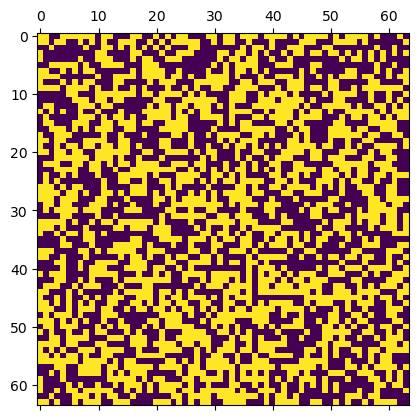

In [9]:
plt.matshow(grid);

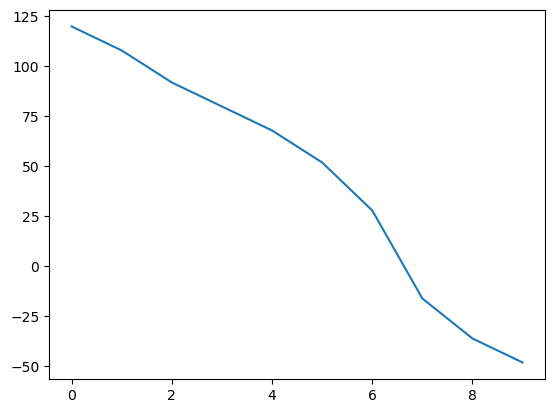

In [10]:
plt.plot(energies)

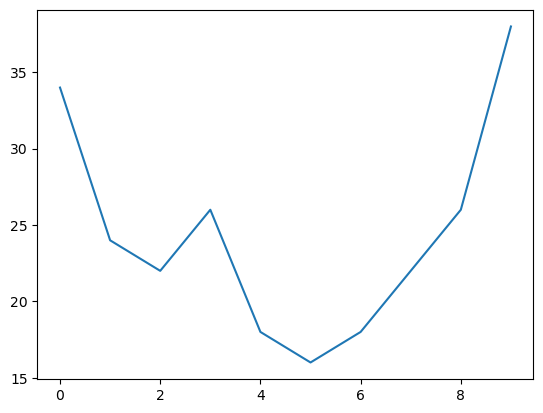

In [11]:
plt.plot(magnetizations)

In [12]:
# After running your metropolis_sweep
grid, energies, magnetizations = im.metropolis_sweep(grid, T=2.27, J=1.0, n_steps=10000)

# Calculate specific heat
L = grid.shape[0]
N = L * L
C_v = im.calculate_specific_heat(energies, T=2.27, N=N)
print(f"Specific heat per spin: {C_v:.4f}")

# Calculate autocorrelation
energy_autocorr, lags = im.autocorrelation_function(energies)
tau_energy = im.integrated_autocorr_time(energy_autocorr)
print(f"Energy autocorrelation time: {tau_energy:.2f}")

Step:  0
Selected spin:  (25, 23)

 Calculated energy diff for spin in coordinates  [25, 23]  is  -0.0

 Energy difference is less than 0, decided TO FLIP
Step:  1
Selected spin:  (29, 59)

 Calculated energy diff for spin in coordinates  [29, 59]  is  0.0

 Energy difference is less than 0, decided TO FLIP
Step:  2
Selected spin:  (63, 37)

 Calculated energy diff for spin in coordinates  [63, 37]  is  -0.0

 Energy difference is less than 0, decided TO FLIP
Step:  3
Selected spin:  (33, 17)

 Calculated energy diff for spin in coordinates  [33, 17]  is  4.0

 exp(-energy_diff/T)<x, decided NOT TO FLIP
Step:  4
Selected spin:  (52, 45)

 Calculated energy diff for spin in coordinates  [52, 45]  is  -8.0

 Energy difference is less than 0, decided TO FLIP
Step:  5
Selected spin:  (12, 23)

 Calculated energy diff for spin in coordinates  [12, 23]  is  -0.0

 Energy difference is less than 0, decided TO FLIP
Step:  6
Selected spin:  (43, 61)

 Calculated energy diff for spin in coordina

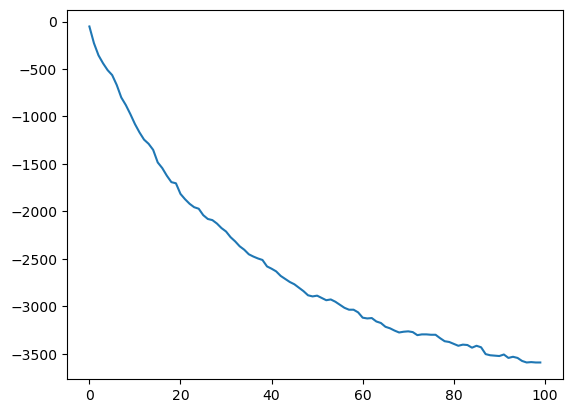

In [13]:
plt.plot(energies)

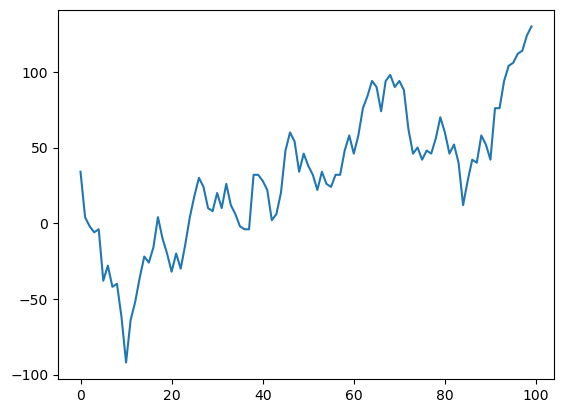

In [14]:
plt.plot(magnetizations)

In [15]:
magnetization_autocorr, lags = im.autocorrelation_function(magnetizations)
tau_magnetization = im.integrated_autocorr_time(magnetization_autocorr)
print(f"Energy autocorrelation time: {tau_magnetization:.2f}")

Energy autocorrelation time: 24.06
